# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [159]:
import csv
import random
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [160]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = np.array([x[0] for x in train_data])
# each point in y_train has 1 value - the 'y' of the molecule
y_train = np.array([x[1] for x in train_data])


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = np.array([x[0] for x in test_data])
y_test = np.array([x[1] for x in test_data])
print((x_train.shape),(x_test.shape))
print((y_train.shape),(y_test.shape))

(240, 25) (60, 25)
(240,) (60,)


### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
We do following steps:
- Randomly initiate W and b values
> Now for each epochs:  
- We calculate predictions and loss function
- We optimize the loss function by gradient descent and change W and b  values  

In [161]:
np.random.randn()

0.47064484240420495

In [162]:
# 1.3.1.2
# implement Linear Regression

def LinearRegression(x_train,x_test,y_train,y_test,lr,epochs=500):
    
    n,d = x_train.shape
    W = np.random.rand(d,1)
    b = np.random.rand()
    # epochs = 10000
    L_tr,L_te=[],[]
    for epoch in range(epochs):
        Btr=np.array([b for i in range(n)])
        Bte=np.array([b for i in range(x_test.shape[0])])
        pred_train = (np.dot(x_train,W) + Btr)[:,0]
        Loss_train = np.mean((pred_train - y_train)**2)/(n)
        pred_test = (np.dot(x_test , W) + Bte)[:,0]
        # print(pred_test)
        # print(((pred_test - y_test)**2).shape)
        
        Loss_test = np.mean((pred_test - y_test)**2)/(n)
        L_tr.append(Loss_train)
        L_te.append(Loss_test)
        
        #Updates 
        Del=[]
        for j in range(d):
            del_w=0
            for i in range(n):
                del_w+=(x_train[i,:]@W+b - y_train[i])*x_train[i,j] 
            Del.append(del_w)
        Del = np.array(Del)
        W = W - (lr/n)*Del
        del_b=0
        for i in range(n):
            del_b+=(x_train[i,:]@W+b - y_train[i])
        b-=(lr/n)*del_b

    # plt.plot([i+1 for i in range(epochs)],L_tr,label="Train loss")
    # plt.plot([i+1 for i in range(epochs)],L_te,label="Test loss")
    # plt.legend()

    plt.show
    return W,b, L_te[-1]

def plot_parity(W,b,x_train,y_train,x_test,y_test):
    # mean_train =np.mean(x_train,axis=0)
    # mean_test =np.mean(x_test,axis=0)
    # std_train =np.std(x_train,axis=0)
    # std_test =np.std(x_test,axis=0)
    # x_train = (x_train - mean_train)/ std_train
    # x_test = (x_test - mean_test)/ std_test

    Btr = [b for x in range(x_train.shape[0])]
    y_pred = (x_train @ W + Btr)[:,0]
    Bte = [b for x in range(x_test.shape[0])]
    y_pred_test = (x_test @ W + Bte)[:,0]
    fig, ax = plt.subplots(1,2,figsize=(7,7))

    ax[0].scatter(y_train, y_pred)

    lims = [
        np.min([ax[0].get_xlim(), ax[0].get_ylim()]),
        np.max([ax[0].get_xlim(), ax[0].get_ylim()]),
    ]
    ax[0].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax[0].set_aspect('equal')
    ax[0].set_xlim(lims)
    ax[0].set_ylim(lims)
    ax[0].set_title('Parity Plot on train data')
    ax[0].set_xlabel('Ground truth y-values')
    ax[0].set_ylabel('Predicted y-values')
    
    ax[1].scatter(y_test, y_pred_test)

    lims = [
        np.min([ax[1].get_xlim(), ax[1].get_ylim()]),
        np.max([ax[1].get_xlim(), ax[1].get_ylim()]),
    ]
    ax[1].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax[1].set_aspect('equal')
    ax[1].set_xlim(lims)
    ax[1].set_ylim(lims)
    ax[1].set_title('Parity Plot on test data')
    ax[1].set_xlabel('Ground truth y-values')
    ax[1].set_ylabel('Predicted y-values')
    plt.show()

# alpha =0.2
# W,b,L=LinearRegression(x_train,x_test,y_train,y_test,alpha)
# print(f'For alpha {alpha} rmse err is {L}')



In [163]:
# # 1.3.2.3
# # try with different learning rates and choose the best one
a= [0.001,0.01, 0.1,0.2,0.3,0.4,0.5,0.7, 1, 3]
for alpha in a:    
    W,b,L=LinearRegression(x_train,x_test,y_train,y_test,alpha)
    print(f'For alpha {alpha} rmse err is {L}')



For alpha 0.001 rmse err is 0.29822595166741217
For alpha 0.01 rmse err is 0.09251834716653394
For alpha 0.1 rmse err is 0.03972099160869532
For alpha 0.2 rmse err is 0.02916715915527216
For alpha 0.3 rmse err is 0.04162780816910497
For alpha 0.4 rmse err is 0.043471686268825166
For alpha 0.5 rmse err is 0.052882065724751424
For alpha 0.7 rmse err is 0.03911941547483918
For alpha 1 rmse err is 0.025523391632968427
For alpha 3 rmse err is 3.151977138692651e+221


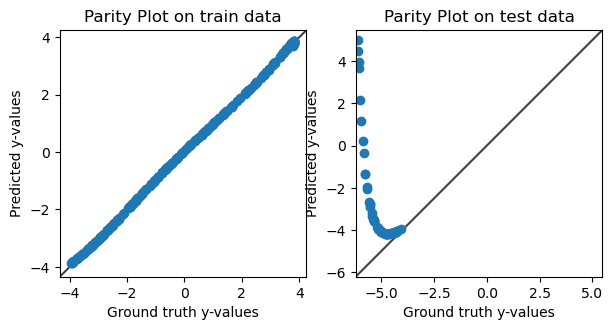

In [164]:
# 1.3.1.4
W,b,L=LinearRegression(x_train,x_test,y_train,y_test,0.3)
plot_parity(W,b,x_train,y_train,x_test,y_test)



### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

> 1.3.2.1   
This regression model is used to avoid overfitting. This is done by applying a penalty term (regularization) to overcome overfitting. Its goal is to reduce the variance by increasing some bias (Bias-variance tradeoff). So, it might give some error during training but perform well in testing.   

Penalty term in Ridge regression is `alpha*slope^2`

In [165]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
err=[]
a= [0.001,0.003,0.01,0.03, 0.1,0.3, 1, 3, 10,30, 100,300,1000,3000]
for alpha in a:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    err.append(rmse)

x=[print(f'For alpha {a[i]} rmse err is {err[i]} ') for i in range(len(a))]

For alpha 0.001 rmse err is 0.07406137814536595 
For alpha 0.003 rmse err is 0.22965887118789655 
For alpha 0.01 rmse err is 0.3073870798290407 
For alpha 0.03 rmse err is 0.24719544635566196 
For alpha 0.1 rmse err is 0.10934861996810713 
For alpha 0.3 rmse err is 0.06101878812667845 
For alpha 1 rmse err is 0.07087132528641461 
For alpha 3 rmse err is 0.17898452854542637 
For alpha 10 rmse err is 0.8020392940375082 
For alpha 30 rmse err is 1.8821682389087184 
For alpha 100 rmse err is 3.206631285055734 
For alpha 300 rmse err is 4.12489664194648 
For alpha 1000 rmse err is 4.674822154896429 
For alpha 3000 rmse err is 4.8812297572434415 


<!-- Your answer to 1.3.2.3 -->

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.The higher the alpha , the most feature coefficients are zero. That is, when alpha is 0 , Lasso regression produces the same coefficients as a linear regression  
- For alpha= 0.3, we get the least error. Hence it is the most optimal learning rate
- For a bigger alpha, it basically, the model goes underfitting giving larger errors
- For a smaller alpha, it basically, the model happens to be overfitting giving larger errors


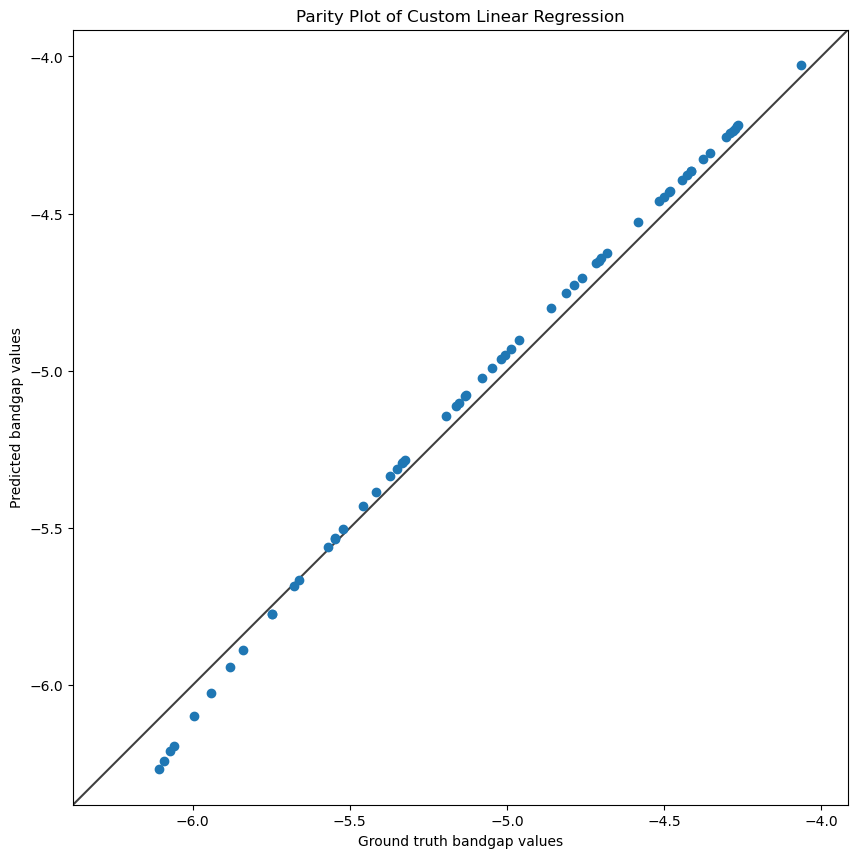

In [166]:
# 1.3.3.4
model = Ridge(alpha=0.3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`  
It is similar to ridge regression. Here only penalty term is changed. In ridge penalty term was `alpha*slope^2` and in lasso regression penalty term is `alpha*|slope|`.

In [167]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
import sklearn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
err=[]
a= [0.001,0.003,0.01,0.03, 0.1,0.3, 1, 3, 10,30, 100,300,1000,3000]
for alpha in a:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    err.append(rmse)

x=[print(f'For alpha {a[i]} rmse err is {err[i]} ') for i in range(len(a))]

For alpha 0.001 rmse err is 0.17966732847322864 
For alpha 0.003 rmse err is 0.2175250532005449 
For alpha 0.01 rmse err is 0.04241996255016703 
For alpha 0.03 rmse err is 0.12185681492530823 
For alpha 0.1 rmse err is 0.41436880742215176 
For alpha 0.3 rmse err is 1.2697472627039896 
For alpha 1 rmse err is 4.269928072334982 
For alpha 3 rmse err is 4.996771333559856 
For alpha 10 rmse err is 4.996771333559856 
For alpha 30 rmse err is 4.996771333559856 
For alpha 100 rmse err is 4.996771333559856 
For alpha 300 rmse err is 4.996771333559856 
For alpha 1000 rmse err is 4.996771333559856 
For alpha 3000 rmse err is 4.996771333559856 


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`  
<!-- Your answer to 1.3.2.3 -->

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.The higher the alpha , the most feature coefficients are zero. That is, when alpha is 0 , Lasso regression produces the same coefficients as a linear regression  
- For alpha= 0.01, we get the least error. Hence it is the most optimal learning rate
- For a bigger alpha, it basically, the model goes underfitting giving larger errors
- For a smaller alpha, it basically, the model happens to be overfitting giving larger errors


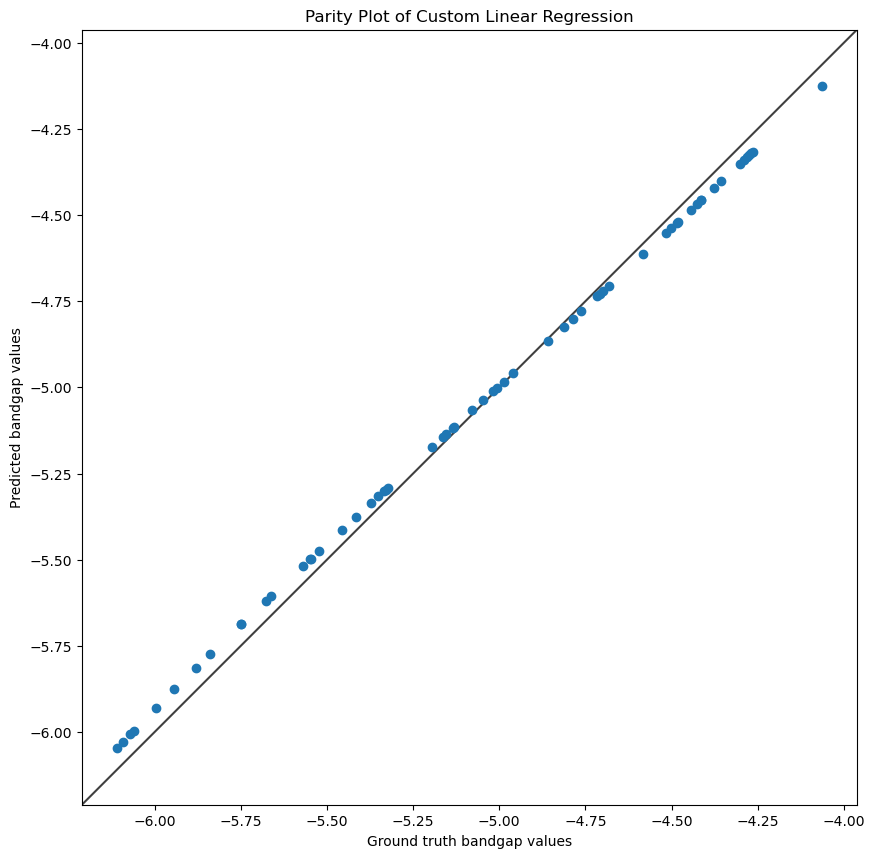

In [168]:
# 1.3.3.4
model = Lasso(alpha=0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()